# E-learning: courses

## Описание данных:

**assessments.csv** — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен):
- *code_module* — идентификационный код предмета.
- *code_presentation* — семестр (Идентификационный код).
- *id_assessment* — тест (Идентификационный номер ассессмента).
- *assessment_type* — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).
- *date* — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).
- *weight* — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

**courses.csv** — файл содержит список предметов по семестрам:
- *code_module* — предмет (идентификационный код).
- *code_presentation* — семестр (идентификационный код).
- *module_presentation_length* — продолжительность семестра в днях.

**studentAssessment.csv** — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу:
- *id_assessment* — тест (идентификационный номер).
- *id_student* — идентификационный номер студента.
- *date_submitted* — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.
- *is_banked* — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).
- *score* — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

**studentRegistration.csv** — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре:
- *code_module* — предмет (идентификационный код).
- *code_presentation* — семестр (идентификационный код)
- *id_student* — идентификационный номер студента.
- *date_registration* — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).
- *date_unregistration* — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

## Задачи

1. Количество студентов успешно завершивших только один курс.
2. Самый сложный и самый простой экзамен: курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью.
3. Средний срок завершения курсов (под сдачей понимаем последнее успешное прохождение экзамена студентом).
4. Cамые популярные предметы (ТОП-3) по количеству регистраций на них и предметы с самым большим оттоком (ТОП-3).
5. Cеместр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов в период с начала 2013 по конец 2014 года.
6. Дополнительно построить адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

%matplotlib inline

# задаем размеры графика в seaborn
sns.set(rc={'figure.figsize':(10, 6)})

## EDA

In [2]:
assessments = pd.read_csv('data/assessments.csv')
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [3]:
courses = pd.read_csv('data/courses.csv')
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [4]:
student_assessment = pd.read_csv('data/studentAssessment.csv')
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [5]:
student_registration = pd.read_csv('data/studentRegistration.csv')
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [6]:
# Количество семестров:
courses.code_presentation.unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [7]:
# Экзамены в семестре 2013B
assessments.query('assessment_type == "Exam" & code_presentation == "2013B"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
23,BBB,2013B,14990,Exam,NaN,100.0
87,DDD,2013B,25340,Exam,240.0,100.0
136,FFF,2013B,34872,Exam,222.0,100.0


In [8]:
# Экзамены в семестре 2013J
assessments.query('assessment_type == "Exam" & code_presentation == "2013J"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
94,DDD,2013J,25354,Exam,261.0,100.0
113,EEE,2013J,30713,Exam,235.0,100.0
149,FFF,2013J,34885,Exam,236.0,100.0
185,GGG,2013J,37424,Exam,229.0,100.0


In [9]:
# Экзамены в семестре 2014B
assessments.query('assessment_type == "Exam" & code_presentation == "2014B"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
47,BBB,2014B,15014,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
101,DDD,2014B,25361,Exam,241.0,100.0
118,EEE,2014B,30718,Exam,228.0,100.0
162,FFF,2014B,34898,Exam,227.0,100.0
195,GGG,2014B,37434,Exam,222.0,100.0


In [10]:
# Экзамены в семестре 2014J
assessments.query('assessment_type == "Exam" & code_presentation == "2014J"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
11,AAA,2014J,1763,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0
108,DDD,2014J,25368,Exam,NaN,100.0
123,EEE,2014J,30723,Exam,235.0,100.0
175,FFF,2014J,34911,Exam,241.0,100.0
205,GGG,2014J,37444,Exam,229.0,100.0


### ССС имеет два экзамена, проверим оценки по этим экзаменам:

**Семестр 2014B**

In [11]:
student_assessment.query('id_assessment == 24290').shape

(747, 5)

In [12]:
student_assessment.query('id_assessment == 40087')

,id_assessment,id_student,date_submitted,is_banked,score


**Семестр 2014J**

In [13]:
student_assessment.query('id_assessment == 24299').shape

(1168, 5)

In [14]:
student_assessment.query('id_assessment == 40088')

,id_assessment,id_student,date_submitted,is_banked,score


In [15]:
# Количетсво регистраций на предмет
student_registration.shape[0]

32593

In [16]:
# Количество уникальных студентов
student_registration.id_student.nunique()

28785

In [17]:
# Проверим вес всех заданий и тестов в курсах
courses_name = courses.code_module.unique() # курсы
semesters = courses.code_presentation.unique() # семестры

for course_name in courses_name:
    for semester in semesters:
        # проверим, что данный курс есть в текущем семестре и посчитаем сумму весом всех заданий
        if course_name in assessments.query('code_presentation == @semester').code_module.unique():
            weight_tasks  = (assessments.query('''code_module == @course_name and \
                                                code_presentation == @semester and \
                                                assessment_type != "Exam"''').weight.sum())
            weight_exam = (assessments.query('''code_module == @course_name and \
                                                code_presentation == @semester and \
                                                assessment_type == "Exam"''').weight.sum())
            print(f'Курс {course_name} в семестре {semester}: задания {weight_tasks}%, экзамен {weight_exam}%')

Курс AAA в семестре 2013J: задания 100.0%, экзамен 100.0%
Курс AAA в семестре 2014J: задания 100.0%, экзамен 100.0%
Курс BBB в семестре 2013J: задания 100.0%, экзамен 100.0%
Курс BBB в семестре 2014J: задания 100.0%, экзамен 100.0%
Курс BBB в семестре 2013B: задания 100.0%, экзамен 100.0%
Курс BBB в семестре 2014B: задания 100.0%, экзамен 100.0%
Курс CCC в семестре 2014J: задания 100.0%, экзамен 200.0%
Курс CCC в семестре 2014B: задания 100.0%, экзамен 200.0%
Курс DDD в семестре 2013J: задания 100.0%, экзамен 100.0%
Курс DDD в семестре 2014J: задания 100.0%, экзамен 100.0%
Курс DDD в семестре 2013B: задания 100.0%, экзамен 100.0%
Курс DDD в семестре 2014B: задания 100.0%, экзамен 100.0%
Курс EEE в семестре 2013J: задания 100.0%, экзамен 100.0%
Курс EEE в семестре 2014J: задания 100.0%, экзамен 100.0%
Курс EEE в семестре 2014B: задания 100.0%, экзамен 100.0%
Курс FFF в семестре 2013J: задания 100.0%, экзамен 100.0%
Курс FFF в семестре 2014J: задания 100.0%, экзамен 100.0%
Курс FFF в сем

#### Добавим веса тестов в курсе GGG, небольшие веса для компьютерных тестов и остальное поровну для тестов, проверяемых преподавателем

In [18]:
# задаем веса заданий, и отбираем индексы тестов в курсе GGG
weights_GGG = [1, 1, 2, 2, 2, 2, 30, 30, 30]
index_weights_GGG_2013J = assessments.query('code_module == "GGG" and code_presentation == "2013J" and assessment_type != "Exam"').index
index_weights_GGG_2014B = assessments.query('code_module == "GGG" and code_presentation == "2014B" and assessment_type != "Exam"').index
index_weights_GGG_2014J = assessments.query('code_module == "GGG" and code_presentation == "2014J" and assessment_type != "Exam"').index

In [19]:
# записываем значения весов в df
assessments.loc[index_weights_GGG_2013J, 'weight'] = weights_GGG
assessments.loc[index_weights_GGG_2014B, 'weight'] = weights_GGG
assessments.loc[index_weights_GGG_2014J, 'weight'] = weights_GGG

In [20]:
# Проверим вес всех заданий и тестов в курсах
courses_name = courses.code_module.unique() # курсы
semesters = courses.code_presentation.unique() # семестры

for course_name in courses_name:
    for semester in semesters:
        # проверим, что данный курс есть в текущем семестре и посчитаем сумму весом всех заданий
        if course_name in assessments.query('code_presentation == @semester').code_module.unique():
            weight_tasks  = (assessments.query('''code_module == @course_name and \
                                                code_presentation == @semester and \
                                                assessment_type != "Exam"''').weight.sum())
            weight_exam = (assessments.query('''code_module == @course_name and \
                                                code_presentation == @semester and \
                                                assessment_type == "Exam"''').weight.sum())
            print(f'Курс {course_name} в семестре {semester}: задания {weight_tasks}%, экзамен {weight_exam}%')

Курс AAA в семестре 2013J: задания 100.0%, экзамен 100.0%
Курс AAA в семестре 2014J: задания 100.0%, экзамен 100.0%
Курс BBB в семестре 2013J: задания 100.0%, экзамен 100.0%
Курс BBB в семестре 2014J: задания 100.0%, экзамен 100.0%
Курс BBB в семестре 2013B: задания 100.0%, экзамен 100.0%
Курс BBB в семестре 2014B: задания 100.0%, экзамен 100.0%
Курс CCC в семестре 2014J: задания 100.0%, экзамен 200.0%
Курс CCC в семестре 2014B: задания 100.0%, экзамен 200.0%
Курс DDD в семестре 2013J: задания 100.0%, экзамен 100.0%
Курс DDD в семестре 2014J: задания 100.0%, экзамен 100.0%
Курс DDD в семестре 2013B: задания 100.0%, экзамен 100.0%
Курс DDD в семестре 2014B: задания 100.0%, экзамен 100.0%
Курс EEE в семестре 2013J: задания 100.0%, экзамен 100.0%
Курс EEE в семестре 2014J: задания 100.0%, экзамен 100.0%
Курс EEE в семестре 2014B: задания 100.0%, экзамен 100.0%
Курс FFF в семестре 2013J: задания 100.0%, экзамен 100.0%
Курс FFF в семестре 2014J: задания 100.0%, экзамен 100.0%
Курс FFF в сем

In [21]:
# Сумма весов заданий в курсе GGG равна 100%

#### Итоги EDA. Определим, что является курсом и другие нюансы.

1. Исходя из данных, у нас есть code_module — предмет, code_presentation — семестр и id_student — идентификационный номер студента.
Так как уникольное количество студентов (id_student) 28785 близко к количеству регистраций на предмет (student_registration.shape)  32593. Можно принять, что предмет = курс. Допустим, курс ААА в семестрах 2013B, 2013J, 2014B, 2014J - это один и тот же курс, проведенный в разных семестрах.

2. В курсе ССС два экзамена с разными id_assessment, так как в итоговых оценках студентов (датафрейм student_assessment) по экзаменам 40087 (2014B) и 40088 (2014J) нет данных, будет использовать id экзаменов 24290 (2014B) и 24299 (2014) для этого курса.

3. Оценки, экзамены:
- Оценки по экзаменам есть только у курсов CCC, DDD, завершенность данных курсов будем считать по успешной сдаче экзамена (score >= 40) - студенты сдавшие успешно экзамен и при этом отчислившиеся отсутствуют.
- По остальным курсам оценок за экзамен нет, поэтому курс считается завершенным, если сданы все задания и score по каждому >= 40 - есть 30 студентов соответствующие данным требованиям, но отчислившихся, будем считать, что на это были другие причины.
- В курсе GGG не было весов заданий, задал их, исходя их следующей логики: небольшие веса для компьютерных тестов и остальное поровну для тестов, проверяемых преподавателем.

## Создадим один общий датафрейм:

In [22]:
student_assessment.shape

(173912, 5)

In [23]:
df1 = student_assessment.merge(assessments, on=['id_assessment'])

In [24]:
df1.shape

(173912, 10)

In [25]:
df1.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [26]:
df2 = df1.merge(courses, on=['code_module', 'code_presentation'])

In [27]:
df2.shape

(173912, 11)

In [28]:
df2.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,268
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,268
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,268
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,268


In [29]:
full_courses_df = df2.merge(student_registration, on=['code_module', 'code_presentation', 'id_student'])

In [30]:
full_courses_df.shape

(173912, 13)

In [31]:
full_courses_df.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,date_registration,date_unregistration
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268,-159.0,NaN
1,1753,11391,53,0,85.0,AAA,2013J,TMA,54.0,20.0,268,-159.0,NaN
2,1754,11391,115,0,80.0,AAA,2013J,TMA,117.0,20.0,268,-159.0,NaN
3,1755,11391,164,0,85.0,AAA,2013J,TMA,166.0,20.0,268,-159.0,NaN
4,1756,11391,212,0,82.0,AAA,2013J,TMA,215.0,30.0,268,-159.0,NaN


## Решение поставленных задач

## 1. Количетсво студентов успешно завершивших только один курс
**(Успешная сдача – это зачёт по курсу на экзамене)**

In [32]:
# отберем тех, кто не отчислился
full_courses_df_wo_unreg = full_courses_df.loc[full_courses_df.date_unregistration.isna()]
full_courses_df_wo_unreg.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,date_registration,date_unregistration
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268,-159.0,NaN
1,1753,11391,53,0,85.0,AAA,2013J,TMA,54.0,20.0,268,-159.0,NaN
2,1754,11391,115,0,80.0,AAA,2013J,TMA,117.0,20.0,268,-159.0,NaN
3,1755,11391,164,0,85.0,AAA,2013J,TMA,166.0,20.0,268,-159.0,NaN
4,1756,11391,212,0,82.0,AAA,2013J,TMA,215.0,30.0,268,-159.0,NaN


#### Найдем id студентов успешно прошедших курс, в котором нет экзамена, исходя из условия:
- **курс считается завершенным, если сданы все задания и score по каждому >= 40**

In [33]:
# добавим в общий df колонку с количеством заданий на курсе
# отберем курсы без экзаменом (все кроме CCC и DDD) и посчитаем количество заданий:
number_of_tasks = (assessments.query('code_module not in ["CCC", "DDD"] & assessment_type != "Exam"')
                              .groupby(['code_module', 'code_presentation'], as_index=False)
                              .agg({'id_assessment': 'count'})
                              .rename(columns={'id_assessment': 'number_of_tasks'}))
number_of_tasks

,code_module,code_presentation,number_of_tasks
0,AAA,2013J,5
1,AAA,2014J,5
2,BBB,2013B,11
3,BBB,2013J,11
4,BBB,2014B,11
5,BBB,2014J,5
6,EEE,2013J,4
7,EEE,2014B,4
8,EEE,2014J,4
9,FFF,2013B,12


In [34]:
# добавим в полный df количество заданий на курсе (в курсах с экзаменом будет NaN)
full_courses_df = full_courses_df.merge(number_of_tasks, how='left',on=['code_module', 'code_presentation'])
full_courses_df.shape

(173912, 14)

In [35]:
# выберем курсы без экзаменов, с оценками более 40 и посчитаем количество заданий для каждого студента
test_takers = (full_courses_df_wo_unreg.query('code_module not in ["CCC", "DDD"] & score >= 40')
                                       .groupby(['id_student', 'code_module', 'code_presentation'], as_index=False)
                                       .agg({'assessment_type': 'count'}))
test_takers.head()

,id_student,code_module,code_presentation,assessment_type
0,6516,AAA,2014J,5
1,11391,AAA,2013J,5
2,23629,BBB,2013B,4
3,23798,BBB,2013J,11
4,24186,GGG,2014B,8


In [36]:
# добавим к полученному df количество тестов в семестре
test_takers = test_takers.merge(number_of_tasks, how='left', on=['code_module', 'code_presentation'])

In [37]:
test_takers.shape[0]

14927

In [38]:
test_takers.head()

,id_student,code_module,code_presentation,assessment_type,number_of_tasks
0,6516,AAA,2014J,5,5
1,11391,AAA,2013J,5,5
2,23629,BBB,2013B,4,11
3,23798,BBB,2013J,11,11
4,24186,GGG,2014B,8,9


In [39]:
# отберем только тех студентов, которые выполнили все тесты
test_takers = test_takers.loc[test_takers.assessment_type == test_takers.number_of_tasks]
test_takers.head()

,id_student,code_module,code_presentation,assessment_type,number_of_tasks
0,6516,AAA,2014J,5,5
1,11391,AAA,2013J,5,5
3,23798,BBB,2013J,11,11
5,24391,GGG,2013J,9,9
7,25107,BBB,2013B,11,11


In [40]:
test_takers.shape[0]

8600

#### Найдем id студентов успешно прошедших курс с экзаменом:
- **завершенность данных курсов будем считать по успешной сдаче экзамена (score >= 40)**

In [41]:
# список id экзаменов
exam_id = assessments.query('assessment_type == "Exam"').id_assessment

In [42]:
# Количество прооведенных экзаменов для каждого студента
student_assessment.query('id_assessment in @exam_id').shape[0]

4959

In [43]:
# Количество успешно пройденных экзаменов score >= 40
completed_exams = full_courses_df_wo_unreg.query('id_assessment in @exam_id and score >= 40').shape[0]
# Df со студентами сдавшими экзамен
exam_takers = full_courses_df_wo_unreg.query('id_assessment in @exam_id and score >= 40')
completed_exams

4392

In [44]:
# Студенты, которые успешно сдали более 1 экзамена, вклочая сдачу первого (keep=False)
# (не является количеством студентов, так как 1 студент мог сдать более 2-х экзаменов)
duplicated_students = (student_assessment.query('id_assessment in @exam_id and score >= 40')
                                         .duplicated(subset='id_student', keep=False)
                                         .sum())
duplicated_students

590

In [45]:
# Соответственно, количество студентов успешно прошедших только 1 курс, в котором есть экзамен (курс CCC или DDD):
completed_exams - duplicated_students

3802

#### Таким образом, у нас есть две серии id студентов, успешно прошедших курс:
- *id_exam_takers*: студенты сдавшие экзамен (курсы CCC и DDD)
- *id_students_without_exams*: студенты сдавшие все тесты (курсы AAA, BBB, EEE, FFF, GGG)

Согласно условию необходимо узнать количество студентов прошедших ТОЛЬКО один курс, соответственно, объединим две серии и уберем id с повторением (keep=True)

In [46]:
ids_completed_of_course = pd.concat([exam_takers.id_student, test_takers.id_student])

In [47]:
ids_completed_of_course.shape[0]

12992

In [48]:
ids_completed_of_course.duplicated(keep=False).sum()

1523

### Ответ: согласно полученным даннным:
- 12992 успеешно пройденых курса
- 1523 студента успешно окончили только 1 курс

## 2. Самый сложный и самый простой экзамен: курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью.

**Для экзаменов в рамках курсов (CCC и DDD):**
- Завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

**Для курсов:**
- Завершаемость = кол-во регистраций на курс / кол-во студентов окончивших курс

### Рассмотрим завершаемость курсов:

In [49]:
# Количество регистраций на каждый курс
count_registrations = (student_registration.groupby('code_module', as_index=False)
                                                     .agg({'id_student': 'count'})
                                                     .rename(columns={'id_student': 'count_registration'}))
count_registrations

,code_module,count_registration
0,AAA,748
1,BBB,7909
2,CCC,4434
3,DDD,6272
4,EEE,2934
5,FFF,7762
6,GGG,2534


In [50]:
# Количество студентов окончивших курс без экзамена:
count_test_takers = (test_takers.groupby('code_module', as_index=False)
                                .agg({'id_student': 'count'})
                                .rename(columns={'id_student': 'count_graduates'}))
count_test_takers

,code_module,count_graduates
0,AAA,512
1,BBB,2336
2,EEE,1563
3,FFF,3218
4,GGG,971


In [51]:
# Количество студентов окончивших курс с экзаменом:
count_exam_takers = (exam_takers.groupby('code_module', as_index=False)
                                .agg({'id_student': 'count'})
                                .rename(columns={'id_student': 'count_graduates'}))
count_exam_takers

,code_module,count_graduates
0,CCC,1683
1,DDD,2709


In [52]:
# Объединим успешно окончивших курсы с экзаменом и без него:
count_graduates = pd.concat([count_test_takers, count_exam_takers], ignore_index=True).sort_values('code_module')
count_graduates

,code_module,count_graduates
0,AAA,512
1,BBB,2336
5,CCC,1683
6,DDD,2709
2,EEE,1563
3,FFF,3218
4,GGG,971


In [53]:
# Объединим df полученные ранее и рассчитаем процент завершаемости курсов:
course_completion = count_registrations.merge(count_graduates, how='left')
course_completion['completion_rate'] = round((course_completion.count_graduates / course_completion.count_registration) * 100, 2)

In [54]:
course_completion.sort_values('completion_rate', ascending=False)

,code_module,count_registration,count_graduates,completion_rate
0,AAA,748,512,68.45
4,EEE,2934,1563,53.27
3,DDD,6272,2709,43.19
5,FFF,7762,3218,41.46
6,GGG,2534,971,38.32
2,CCC,4434,1683,37.96
1,BBB,7909,2336,29.54


#### Завершаемость курсов:
- **Самая высокая завершаемость у курса AAA: 68.45%**
- **Самая низкая завершаемость у курса BBB: 29.54%**

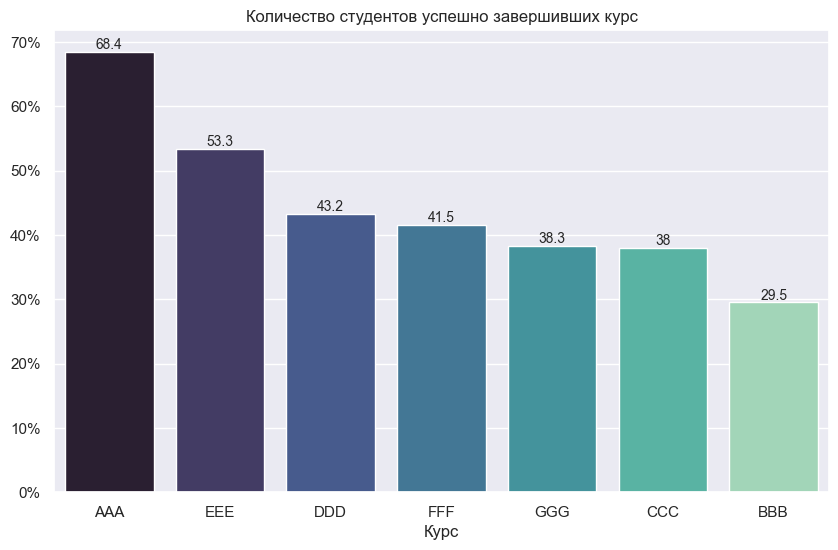

In [122]:
ax = sns.barplot(course_completion.sort_values('completion_rate', ascending=False).round(1),
                 x='code_module',
                 y='completion_rate',
                 palette='mako')

ax.set_title('Количество студентов успешно завершивших курс')
ax.set_xlabel('Курс')
ax.set_ylabel(None)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.bar_label(ax.containers[0], fontsize=10);

### Найдем наиболее сложный экзамен:
Экзамены проводились только у курсов CCC и DDD

In [56]:
# Количество всех попыток сдать экзамен:
attempts = (full_courses_df.query('assessment_type == "Exam"')
                           .groupby('code_module', as_index=False)
                           .agg({'score': 'count'})
                           .rename(columns={'score': 'attempts_to_pass'}))
attempts

,code_module,attempts_to_pass
0,CCC,1915
1,DDD,3044


In [57]:
# Объединим df полученные ранее и рассчитаем процент завершаемости экзаменов:
exam_completion = attempts.merge(count_exam_takers, on='code_module', how='left')
exam_completion['exam_completion_rate'] = round((exam_completion.count_graduates / exam_completion.attempts_to_pass) * 100, 2)

In [58]:
exam_completion

,code_module,attempts_to_pass,count_graduates,exam_completion_rate
0,CCC,1915,1683,87.89
1,DDD,3044,2709,88.99


#### Завершаемость экзаменов практически идентична:
- **У курса CCC: 87.89%**
- **У курса DDD: 88.99%**

### Ответ на задание 2:
#### Завершаемость курсов:
- **Самая высокая завершаемость у курса AAA: 68.45%**
- **Самая низкая завершаемость у курса BBB: 29.54%**
#### Завершаемость экзаменов практически идентична:
- **У курса CCC: 87.89%**
- **У курса DDD: 88.99%**

## 3. Средний срок завершения курсов (под сдачей понимаем последнее успешное прохождение экзамена студентом).

In [59]:
# россчитаем средний срок сдачи экзаменов:
mean_pass_dates_exams = (exam_takers.groupby('code_module', as_index=False)
                                    .agg({'date_submitted': 'mean'})
                                    .round(2)
                                    .rename(columns={'date_submitted': 'mean_pass_date'}))
mean_pass_dates_exams

,code_module,mean_pass_date
0,CCC,239.35
1,DDD,237.98


#### Для расчета среднего срока сдачи курсов без экзамена найдем последенее задание, которое сдал студент, и возьмем его срок сдачи:

In [60]:
# сделаем полный df для студентов, прошедших курс без экзамена:
# колонка для поиска
test_takers['compare'] = (test_takers['id_student'].map(str)
                          + test_takers['code_module'].map(str)
                          + test_takers['code_presentation'].map(str))

full_courses_df['compare'] = (full_courses_df['id_student'].map(str)
                              + full_courses_df['code_module'].map(str)
                              + full_courses_df['code_presentation'].map(str))

In [61]:
# полный df для студентов, прошедших курс без экзамена:
full_test_takers = (full_courses_df.loc[full_courses_df['compare']
                                   .isin(test_takers['compare'])])

In [62]:
# отберем последний сданный тест
last_task_date = (full_test_takers.groupby(['id_student', 'code_module', 'code_presentation'], as_index=False)
                                  .agg({'date_submitted': 'max'}))
last_task_date.shape

(8600, 4)

In [63]:
# удалим столбцы compare
test_takers = test_takers.drop(columns=['compare'])
full_courses_df = full_courses_df.drop(columns=['compare'])

In [64]:
# определим средний срок сдачи последнего задания на курсах без экзамена
mean_pass_dates_tasks = (last_task_date.groupby('code_module', as_index=False)
                                       .agg({'date_submitted': 'mean'})
                                       .round(2)
                                       .rename(columns={'date_submitted': 'mean_pass_date'}))
mean_pass_dates_tasks

,code_module,mean_pass_date
0,AAA,214.34
1,BBB,200.79
2,EEE,160.12
3,FFF,214.64
4,GGG,219.04


In [65]:
# объединим полученные df
mean_pass_dates = (pd.concat([mean_pass_dates_tasks, mean_pass_dates_exams], ignore_index=True)
                     .sort_values('code_module'))
mean_pass_dates

,code_module,mean_pass_date
0,AAA,214.34
1,BBB,200.79
5,CCC,239.35
6,DDD,237.98
2,EEE,160.12
3,FFF,214.64
4,GGG,219.04


In [66]:
(mean_pass_dates.sort_values('mean_pass_date', ascending=False)
                .reset_index(drop=True)
                .round(0))

,code_module,mean_pass_date
0,CCC,239.0
1,DDD,238.0
2,GGG,219.0
3,FFF,215.0
4,AAA,214.0
5,BBB,201.0
6,EEE,160.0


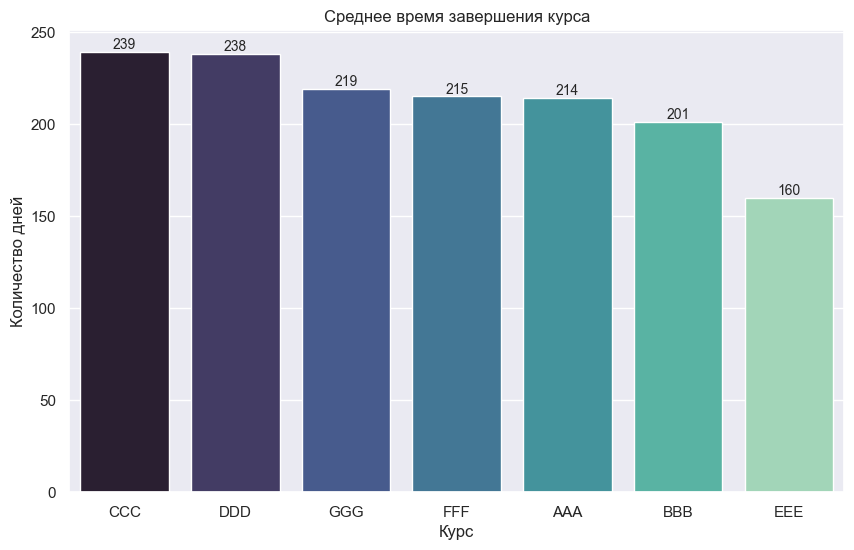

In [124]:
ax = sns.barplot(mean_pass_dates.sort_values('mean_pass_date', ascending=False).round(0),
                 x='code_module',
                 y='mean_pass_date',
                 palette='mako')

ax.set_title('Среднее время завершения курса')
ax.set_xlabel('Курс')
ax.set_ylabel('Количество дней')
ax.bar_label(ax.containers[0], fontsize=10);

### Ответ на 3 задание:

**Среднее время завершения курса (сдачи экзамена или сдачи последнего задания, если в курсе не проводился экзамен):**
- CCC	239 дней
- DDD	238 дней
- GGG	219 дней
- FFF	215 дней
- AAA	211 дней
- BBB	200 дней
- EEE	160 дней

Наибольшие сроки сдачи у курсов с экзаменом (CCC, DDD).

Слишком ранние сроки сдачи последнего задания у курса ЕЕЕ: 160 дней.

## 4. Cамые популярные предметы (ТОП-3) по количеству регистраций на них и предметы с самым большим оттоком (ТОП-3).

In [68]:
# количество регистраций на каждый курс уже посчитаны:
count_registrations.sort_values('count_registration', ascending=False)

,code_module,count_registration
1,BBB,7909
5,FFF,7762
3,DDD,6272
2,CCC,4434
4,EEE,2934
6,GGG,2534
0,AAA,748


**Так как отношение числа студентов окончивших курс к зарегистрированным посчитано в задании 2.**

Отток будем считать следующим образом:

Отток = date_unregistration не равное NaN / количество регистраций

In [69]:
# отберем студентов очислившихся с куросв (date_unregistration != NaN)
unregistration_students = student_registration.loc[~student_registration.date_unregistration.isna()]
unregistration_students.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
2,AAA,2013J,30268,-92.0,12.0
15,AAA,2013J,65002,-180.0,96.0
22,AAA,2013J,94961,-170.0,72.0
29,AAA,2013J,106247,5.0,175.0
41,AAA,2013J,129955,-197.0,135.0


In [70]:
# посчитаем количество отчислившихся стдуентов на каждом курсе
count_unregistrations = (unregistration_students.groupby('code_module', as_index=False)
                                                .agg({'id_student': 'count'})
                                                .rename(columns={'id_student': 'count_unregistration'}))
count_unregistrations.sort_values('count_unregistration', ascending=False)

,code_module,count_unregistration
5,FFF,2380
1,BBB,2377
3,DDD,2235
2,CCC,1947
4,EEE,718
6,GGG,289
0,AAA,126


In [71]:
# объединим полученные df и посчитаем процент отчислившихся студентов
unregistration_rate = count_registrations.merge(count_unregistrations, how='left', on='code_module')
unregistration_rate['unregistration_rate'] = round((unregistration_rate.count_unregistration / unregistration_rate.count_registration)
                                                   * 100, 2)

In [72]:
unregistration_rate

,code_module,count_registration,count_unregistration,unregistration_rate
0,AAA,748,126,16.84
1,BBB,7909,2377,30.05
2,CCC,4434,1947,43.91
3,DDD,6272,2235,35.63
4,EEE,2934,718,24.47
5,FFF,7762,2380,30.66
6,GGG,2534,289,11.40


In [73]:
unregistration_rate.sort_values('unregistration_rate', ascending=False)[['code_module', 'unregistration_rate']]

,code_module,unregistration_rate
2,CCC,43.91
3,DDD,35.63
5,FFF,30.66
1,BBB,30.05
4,EEE,24.47
0,AAA,16.84
6,GGG,11.40


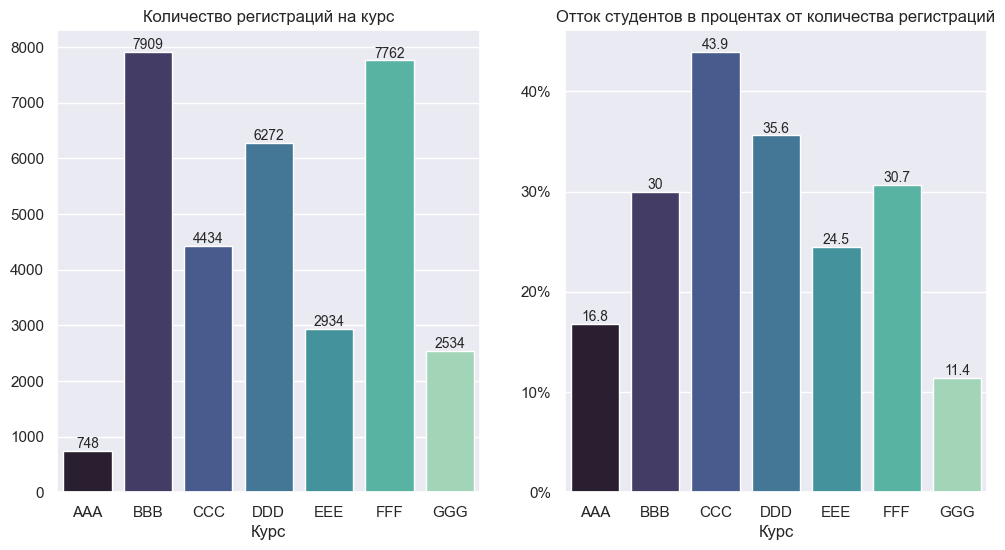

In [126]:
figs, axes = plt.subplots(1, 2, figsize=(12, 6))

ax0 = sns.barplot(count_registrations,
                 x='code_module',
                 y='count_registration',
                 palette='mako',
                 ax=axes[0])

ax0.set_title('Количество регистраций на курс')
ax0.set_xlabel('Курс')
ax0.set_ylabel(None)
ax0.bar_label(ax0.containers[0], fontsize=10);

ax1 = sns.barplot(unregistration_rate.round(1),
                 x='code_module',
                 y='unregistration_rate',
                 palette='mako',
                 ax=axes[1])

ax1.set_title('Отток студентов в процентах от количества регистраций')
ax1.set_xlabel('Курс')
ax1.set_ylabel(None)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax1.bar_label(ax1.containers[0], fontsize=10);

### Ответ на 4 задание:
**ТОП-3 курса с наибольшим количеством регистраций:**
- BBB	7909 регистраций
- FFF	7762 регистраций
- DDD	6272 регистраций

**ТОП-3 курса с наибольшим оттоком (процент от зарегистрированных на курс):**
- CCC	43.91%
- DDD	35.63%
- FFF	30.66%

Наибольшее количество регистраций и наибольший отток студентов идет с курсов с экзаменами (CCC и DDD): 43.91% и 35.63%, соответственно.

## 5. Cеместр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов в период с начала 2013 по конец 2014 года.

**Завершаемость курсов будем считать аналогично заданию 2.**

**Средние сроки аналогично заданию 3.**

**Будет отличаться только группировка.**

### Определим завершаемость курсов в каждом в семестре

In [75]:
# Количество регистраций на курсы в семестре
count_registrations_per_semester = (student_registration.groupby('code_presentation', as_index=False)
                                                        .agg({'id_student': 'count'})
                                                        .rename(columns={'id_student': 'count_registration'}))
count_registrations_per_semester

,code_presentation,count_registration
0,2013B,4684
1,2013J,8845
2,2014B,7804
3,2014J,11260


In [76]:
# Количество студентов окончивших курс без экзамена:
count_test_takers_per_semester = (test_takers.groupby('code_presentation', as_index=False)
                                             .agg({'id_student': 'count'})
                                             .rename(columns={'id_student': 'count_graduates'}))
count_test_takers_per_semester

,code_presentation,count_graduates
0,2013B,1209
1,2013J,2903
2,2014B,1658
3,2014J,2830


In [77]:
# Количество студентов окончивших курс с экзаменом:
count_exam_takers_per_semester = (exam_takers.groupby('code_presentation', as_index=False)
                                             .agg({'id_student': 'count'})
                                             .rename(columns={'id_student': 'count_graduates'}))
count_exam_takers_per_semester

,code_presentation,count_graduates
0,2013B,504
1,2013J,878
2,2014B,1149
3,2014J,1861


In [78]:
# сложим количество завершивших курс с экзаменом и без:
count_graduates_per_semester = count_test_takers_per_semester.copy()
count_graduates_per_semester['count_graduates'] = count_graduates_per_semester.count_graduates + count_exam_takers_per_semester.count_graduates

In [79]:
count_graduates_per_semester

,code_presentation,count_graduates
0,2013B,1713
1,2013J,3781
2,2014B,2807
3,2014J,4691


In [80]:
# объединим полученные df и посчитаем процент завершаемости курса в семестре
completed_courses_per_semester = count_registrations_per_semester.merge(count_graduates_per_semester,
                                                                       on='code_presentation',
                                                                       how='left')
completed_courses_per_semester['completion_rate'] = round((completed_courses_per_semester.count_graduates / completed_courses_per_semester.count_registration)
                                                          * 100, 2)

In [81]:
completed_courses_per_semester

,code_presentation,count_registration,count_graduates,completion_rate
0,2013B,4684,1713,36.57
1,2013J,8845,3781,42.75
2,2014B,7804,2807,35.97
3,2014J,11260,4691,41.66


In [82]:
completed_courses_per_semester[['code_presentation', 'completion_rate']].sort_values('completion_rate', ascending=True)

,code_presentation,completion_rate
2,2014B,35.97
0,2013B,36.57
3,2014J,41.66
1,2013J,42.75


#### Семестр с самой низкой завершаемостью курсов: 2014B (35.97%)

### Определим средние сроки сдачи курсов в семестре

In [83]:
# россчитаем средний срок сдачи экзамена в семестре:
mean_pass_dates_exams_per_semester = (exam_takers.groupby('code_presentation', as_index=False)
                                                 .agg({'date_submitted': 'mean'})
                                                 .round(2)
                                                 .rename(columns={'date_submitted': 'mean_pass_date'}))
mean_pass_dates_exams_per_semester

,code_presentation,mean_pass_date
0,2013B,230.16
1,2013J,239.51
2,2014B,233.00
3,2014J,243.68


#### Для расчета среднего срока сдачи курсов без экзамена найдем последенее задание, которое сдал студент, и возьмем его срок сдачи:

In [84]:
# df студентов, прошедших курс без экзамена, и значением последней сдачи задания:
last_task_date.head()

,id_student,code_module,code_presentation,date_submitted
0,6516,AAA,2014J,210
1,11391,AAA,2013J,212
2,23798,BBB,2013J,210
3,24391,GGG,2013J,220
4,25107,BBB,2013B,189


In [85]:
# определим средний срок сдачи последнего задания на курсах без экзамена
mean_pass_dates_tasks_per_semester = (last_task_date.groupby('code_presentation', as_index=False)
                                                    .agg({'date_submitted': 'mean'})
                                                    .round(2)
                                                    .rename(columns={'date_submitted': 'mean_pass_date'}))
mean_pass_dates_tasks_per_semester

,code_presentation,mean_pass_date
0,2013B,199.08
1,2013J,203.71
2,2014B,196.05
3,2014J,203.31


In [86]:
# объединим полученные df, взяв среднее для mean_pass_date в каждом df,
# таким образом получим срдений срок прохождения курса в семестре
mean_pass_dates_per_semester = mean_pass_dates_exams_per_semester.copy()
mean_pass_dates_per_semester['mean_pass_date'] = round((mean_pass_dates_per_semester.mean_pass_date
                                                        + mean_pass_dates_tasks_per_semester.mean_pass_date)
                                                        / 2,
                                                        1)

In [87]:
mean_pass_dates_per_semester.sort_values('mean_pass_date', ascending=False)

,code_presentation,mean_pass_date
3,2014J,223.5
1,2013J,221.6
0,2013B,214.6
2,2014B,214.5


#### Семестр с самыми долгими средними сроками сдачи курсов: 2014J (223.3 дня)

In [88]:
# общая информация
semesters_info = completed_courses_per_semester.merge(mean_pass_dates_per_semester,
                                                     how='left',
                                                     on='code_presentation')
semesters_info

,code_presentation,count_registration,count_graduates,completion_rate,mean_pass_date
0,2013B,4684,1713,36.57,214.6
1,2013J,8845,3781,42.75,221.6
2,2014B,7804,2807,35.97,214.5
3,2014J,11260,4691,41.66,223.5


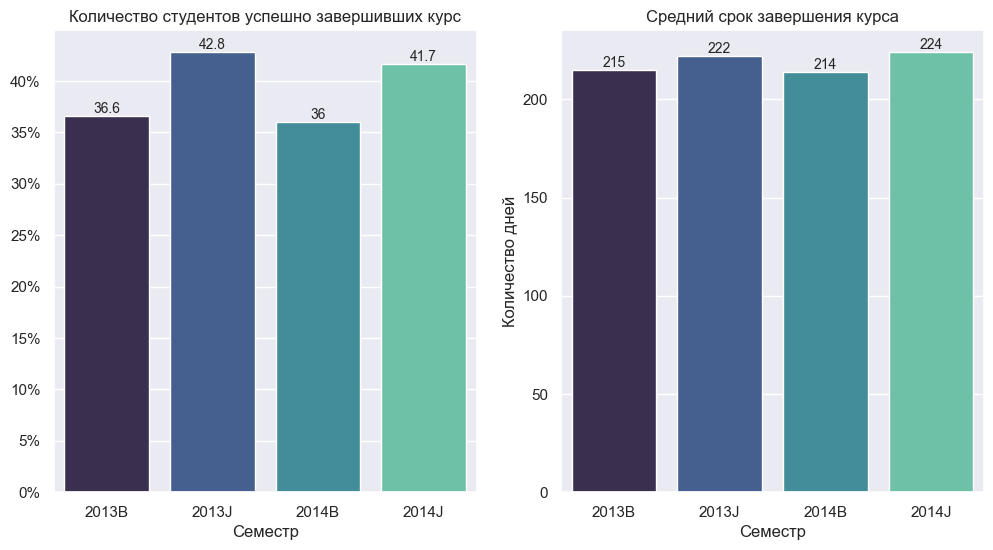

In [128]:
figs, axes = plt.subplots(1, 2, figsize=(12, 6))

ax0 = sns.barplot(semesters_info.round(1),
                 x='code_presentation',
                 y='completion_rate',
                 palette='mako',
                 ax=axes[0])

ax0.set_title('Количество студентов успешно завершивших курс')
ax0.set_xlabel('Семестр')
ax0.set_ylabel(None)
ax0.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

ax0.bar_label(ax0.containers[0], fontsize=10);

ax1 = sns.barplot(semesters_info.round(0),
                 x='code_presentation',
                 y='mean_pass_date',
                 palette='mako',
                 ax=axes[1])

ax1.set_title('Средний срок завершения курса')
ax1.set_xlabel('Семестр')
ax1.set_ylabel('Количество дней')
ax1.bar_label(ax1.containers[0], fontsize=10);

### Ответ на задание 5:
- **Семестр с самой низкой завершаемостью курсов: 2014B (35.97%)**
- **Семестр с самыми долгими средними сроками сдачи курсов: 2014J (223.3 дня)**

Определеть один худший семестр по этим двум параметрам сложно:
- **Наименьшая завершаемость у курсов с индексом B, около 36%**
- **Наибольшие средние сроки сдачи у курсов с индексом J, около 222 дней**

##  Задание 6.

Часто для качественного анализа аудитории используют подходы, основанные на сегментации. 

Построем адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию.
- В адаптированной кластеризации можно выбрать следующие метрики:
- R - среднее время сдачи одного экзамена,
- F - завершаемость курсов,
- M - среднее количество баллов, получаемое за экзамен.

### Дополнительно:
- R - среднее время сдачи одного курса (сдача экзамена, если его нет, то сдача последнего теста)
- F - возьмем количество пройденных курсов, так как у нас большинство зарегестрировались и прошли только 1 курс => практически у всех 100% проходимость курсов, если считать так: количество пройденных курсов / количество регистраций на курсы у студента. Количество пройденных курсов у 1 студента покажет нам лояльность, сколько студентов готовы пройти еще курс, если прошли хотябы один
- M - среднее количество баллов, получаемое за экзамен, для курсов без экзамена возьмем сумму взвешенных оценок за курс (score * weight)
- Для расчета будем использовать все данные (рекомендуется использовать год), так как у нас много уникальных пользователей и  мало повторных регистраций на курсы => метрика F имеет слишком низкую изменчивость, так как большинство зарегистрировались и прошли только 1 курс

In [90]:
# R - чем меньше значение, тем лучше
def r_score(x):
    if x <= quintiles['Recency'][.33]:
        return 3
    elif x <= quintiles['Recency'][.66]:
        return 2
    else:
        return 1

def m_score(x, c):
    if x <= quintiles[c][.33]:
        return 1
    elif x <= quintiles[c][.66]:
        return 2
    else:
        return 3    

### R: Среднее время сдачи курса

In [91]:
# россчитаем средний срок сдачи экзаменов в 2014 году:
mean_pass_dates_exams_RFM = (exam_takers.groupby('id_student', as_index=False)
                                        .agg({'date_submitted': 'mean'})
                                        .round(2)
                                        .rename(columns={'date_submitted': 'Recency'}))
mean_pass_dates_exams_RFM

,id_student,Recency
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0
...,...,...
4092,2694886,236.0
4093,2694933,230.0
4094,2695608,237.0
4095,2697181,230.0


In [92]:
# last_task_date - содержить срок сдачи последнего теста,
# рассчитаем средний срок сдачи последнего теста в 2014 году для каждого курса без экзамена
mean_pass_dates_tasks_RFM = (last_task_date.groupby('id_student', as_index=False)
                                           .agg({'date_submitted': 'mean'})
                                           .round(2)
                                           .rename(columns={'date_submitted': 'Recency'}))
mean_pass_dates_tasks_RFM

,id_student,Recency
0,6516,210.0
1,11391,212.0
2,23798,210.0
3,24391,220.0
4,25107,189.0
...,...,...
8569,2697921,229.0
8570,2698125,227.0
8571,2698257,215.0
8572,2698577,201.0


In [93]:
# объединим полученные df
mean_pass_dates_RFM = (pd.concat([mean_pass_dates_tasks_RFM, mean_pass_dates_exams_RFM], ignore_index=True)
                          .reset_index(drop=True))
mean_pass_dates_RFM

,id_student,Recency
0,6516,210.0
1,11391,212.0
2,23798,210.0
3,24391,220.0
4,25107,189.0
...,...,...
12666,2694886,236.0
12667,2694933,230.0
12668,2695608,237.0
12669,2697181,230.0


In [94]:
# так как могут быть студенты прошедшие курс с экзаменом и без, сделаем повторную группировку по студентам
mean_pass_dates_RFM = (mean_pass_dates_RFM.groupby('id_student', as_index=False)
                                            .agg({'Recency': 'mean'})
                                            .round(2))

In [95]:
mean_pass_dates_RFM

,id_student,Recency
0,6516,210.0
1,11391,212.0
2,23698,243.0
3,23798,210.0
4,24213,236.0
...,...,...
12224,2698125,227.0
12225,2698251,234.0
12226,2698257,215.0
12227,2698577,201.0


### F: Завершаемость курсов

In [96]:
# количество пройденных курсов с экзаменами для каждого студента
count_finished_exam_courses_RFM = (exam_takers.groupby(['id_student'], as_index=False)
                                              .agg({'score': 'count'})
                                              .rename(columns={'score': 'finished_courses'})
                                              .sort_values('finished_courses'))
count_finished_exam_courses_RFM

,id_student,finished_courses
0,23698,1
2694,627399,1
2695,627401,1
2696,627417,1
2697,627453,1
...,...,...
3612,1442991,2
3610,1440467,2
462,355935,2
1580,563016,2


In [97]:
# количество пройденных курсов без экзамена для каждого студента
count_finished_test_courses_RFM = (test_takers.groupby(['id_student'], as_index=False)
                                              .agg({'code_module': 'count'})
                                              .rename(columns={'code_module': 'finished_courses'})
                                              .sort_values('finished_courses'))
count_finished_test_courses_RFM

,id_student,finished_courses
0,6516,1
5723,627549,1
5722,627521,1
5721,627516,1
5720,627509,1
...,...,...
5109,610405,2
4934,606391,2
3827,582460,2
5070,609403,2


In [98]:
# объединим полученные df
count_finished_courses_RFM = (pd.concat([count_finished_exam_courses_RFM, count_finished_test_courses_RFM], ignore_index=True)
                                .sort_values('finished_courses')
                                .reset_index(drop=True))
count_finished_courses_RFM

,id_student,finished_courses
0,23698,1
1,431251,1
2,431025,1
3,431014,1
4,430708,1
...,...,...
12666,690365,2
12667,395757,2
12668,690733,2
12669,622541,2


In [99]:
# количество пройденных курсов для каждого студента
count_finished_courses_RFM = (count_finished_courses_RFM.groupby(['id_student'], as_index=False)
                                                        .agg({'finished_courses': 'sum'})
                                                        .rename(columns={'finished_courses': 'Frequency'}))
count_finished_courses_RFM

,id_student,Frequency
0,6516,1
1,11391,1
2,23698,1
3,23798,1
4,24213,1
...,...,...
12224,2698125,1
12225,2698251,1
12226,2698257,1
12227,2698577,1


#### Пробовал считать по завершаемости курсов, получается слишком красиво, 91% имеют 100% завершаемость (так как мы считаем только по тем, кто прошел хотябы 1 курс):

In [100]:
# # посчитаем количество регистраций на курс для каждого студента
# count_regs = (student_registration.groupby('id_student', as_index=False)
#                                   .agg({'code_presentation': 'count'})
#                                   .rename(columns={'code_presentation': 'count_registration'}))
# count_regs

# # добавим столбец с количеством регистраций на курсы для студентов прошедших хоть один курс
# count_finished_courses_RFM = count_finished_courses_RFM.merge(count_regs, how='left', on='id_student')
# count_finished_courses_RFM

# # посчитаем завршаемость курсов
# count_finished_courses_RFM['Frequency'] = round(count_finished_courses_RFM.finished_courses / count_finished_courses_RFM.count_registration * 100, 2)
# count_finished_courses_RFM

# # удалим лишние столбцы
# count_finished_courses_RFM = count_finished_courses_RFM.drop(columns=['finished_courses', 'count_registration'])
# count_finished_courses_RFM.head()

### M: Среднее количество баллов, получаемое за курс (экзамен)

In [101]:
# посчитаем среднее количество баллов за экзамены в курсе в 2014 году
mean_exam_score_RFM = (exam_takers.groupby(['id_student'], as_index=False)
                                   .agg({'score': 'mean'})
                                   .rename(columns={'score': 'Monetary'})
                                   .round(2))
mean_exam_score_RFM

,id_student,Monetary
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0
...,...,...
4092,2694886,69.0
4093,2694933,73.0
4094,2695608,73.0
4095,2697181,80.0


In [102]:
# посчитаем взвешенные оценки тестов
full_test_takers['weight_score'] = (full_test_takers.weight * full_test_takers.score) / 100
full_test_takers.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,date_registration,date_unregistration,number_of_tasks,compare,weight_score
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268,-159.0,NaN,5.0,11391AAA2013J,7.8
1,1753,11391,53,0,85.0,AAA,2013J,TMA,54.0,20.0,268,-159.0,NaN,5.0,11391AAA2013J,17.0
2,1754,11391,115,0,80.0,AAA,2013J,TMA,117.0,20.0,268,-159.0,NaN,5.0,11391AAA2013J,16.0
3,1755,11391,164,0,85.0,AAA,2013J,TMA,166.0,20.0,268,-159.0,NaN,5.0,11391AAA2013J,17.0
4,1756,11391,212,0,82.0,AAA,2013J,TMA,215.0,30.0,268,-159.0,NaN,5.0,11391AAA2013J,24.6


In [103]:
# посчитаем сумму баллов для каждого студента в курсе за семестр
test_takers_score = (full_test_takers.groupby(['id_student', 'code_module', 'code_presentation'], as_index=False)
                                     .agg({'weight_score': 'sum'}))
test_takers_score.shape

(8600, 4)

In [104]:
# посчитаем среднее количество баллов в каждом курсе
mean_test_score_RFM = (test_takers_score.groupby(['id_student'], as_index=False)
                                        .agg({'weight_score': 'mean'})
                                        .rename(columns={'weight_score': 'Monetary'})
                                        .round(2))
mean_test_score_RFM

,id_student,Monetary
0,6516,63.50
1,11391,82.40
2,23798,89.24
3,24391,81.40
4,25107,60.51
...,...,...
8569,2697921,80.25
8570,2698125,68.00
8571,2698257,69.40
8572,2698577,55.80


In [105]:
# объединим полученные Df
mean_score_RFM = (pd.concat([mean_test_score_RFM, mean_exam_score_RFM], ignore_index=True)
                    .reset_index(drop=True))
mean_score_RFM

,id_student,Monetary
0,6516,63.50
1,11391,82.40
2,23798,89.24
3,24391,81.40
4,25107,60.51
...,...,...
12666,2694886,69.00
12667,2694933,73.00
12668,2695608,73.00
12669,2697181,80.00


In [106]:
# так как могут быть студенты прошедшие курс с экзаменом и без, сделаем повторную группировку по студентам
mean_score_RFM = (mean_score_RFM.groupby('id_student', as_index=False)
                                .agg({'Monetary': 'mean'})
                                .round(2))
mean_score_RFM

,id_student,Monetary
0,6516,63.50
1,11391,82.40
2,23698,80.00
3,23798,89.24
4,24213,58.00
...,...,...
12224,2698125,68.00
12225,2698251,44.00
12226,2698257,69.40
12227,2698577,55.80


### Объединим полученные значения R, F, M

In [107]:
RFM_courses = mean_pass_dates_RFM.merge(count_finished_courses_RFM, how='left', on='id_student')
RFM_courses = RFM_courses.merge(mean_score_RFM, how='left', on='id_student')
RFM_courses

,id_student,Recency,Frequency,Monetary
0,6516,210.0,1,63.50
1,11391,212.0,1,82.40
2,23698,243.0,1,80.00
3,23798,210.0,1,89.24
4,24213,236.0,1,58.00
...,...,...,...,...
12224,2698125,227.0,1,68.00
12225,2698251,234.0,1,44.00
12226,2698257,215.0,1,69.40
12227,2698577,201.0,1,55.80


### Присвоим ранги R, F, M

In [108]:
# рассчитываем квантили
quintiles = RFM_courses[['Recency', 'Frequency', 'Monetary']].quantile([.33, .66]).to_dict()
quintiles

{'Recency': {0.33: 207.0, 0.66: 230.0},
 'Frequency': {0.33: 1.0, 0.66: 1.0},
 'Monetary': {0.33: 70.1, 0.66: 81.94}}

**Как и было сказано раннее, слишком большое количество студентов регистрируется и проходит всего 1 курс, а максимльное количество пройденных курсов 1 студентом = 3, поэтому пусть F = Frequency**

In [109]:
# присвоим ранги Recency, Frequency, Monetary, функции описаны вначале задания:
RFM_courses['R'] = RFM_courses['Recency'].apply(lambda x: r_score(x))
RFM_courses['F'] = RFM_courses['Frequency']
RFM_courses['M'] = RFM_courses['Monetary'].apply(lambda x: m_score(x, 'Monetary'))

In [110]:
RFM_courses

,id_student,Recency,Frequency,Monetary,R,F,M
0,6516,210.0,1,63.50,2,1,1
1,11391,212.0,1,82.40,2,1,3
2,23698,243.0,1,80.00,1,1,2
3,23798,210.0,1,89.24,2,1,3
4,24213,236.0,1,58.00,1,1,1
...,...,...,...,...,...,...,...
12224,2698125,227.0,1,68.00,2,1,1
12225,2698251,234.0,1,44.00,1,1,1
12226,2698257,215.0,1,69.40,2,1,1
12227,2698577,201.0,1,55.80,3,1,1


In [111]:
# посчитаем RFM score
RFM_courses['RFM_score'] = RFM_courses['R'].map(str) + RFM_courses['F'].map(str) + RFM_courses['M'].map(str)
RFM_courses

,id_student,Recency,Frequency,Monetary,R,F,M,RFM_score
0,6516,210.0,1,63.50,2,1,1,211
1,11391,212.0,1,82.40,2,1,3,213
2,23698,243.0,1,80.00,1,1,2,112
3,23798,210.0,1,89.24,2,1,3,213
4,24213,236.0,1,58.00,1,1,1,111
...,...,...,...,...,...,...,...,...
12224,2698125,227.0,1,68.00,2,1,1,211
12225,2698251,234.0,1,44.00,1,1,1,111
12226,2698257,215.0,1,69.40,2,1,1,211
12227,2698577,201.0,1,55.80,3,1,1,311


In [112]:
# зададим матрицу
segt_map = {
    r'11': 'Медлительные, риск',
    r'21': 'Средние, риск',
    r'31': 'Быстрые, риск',
    r'[1-3]2': 'Потенциально лояльные',
    r'[1-3]3': 'Лояльные'
}

RFM_courses['Segment'] = RFM_courses['R'].map(str) + RFM_courses['F'].map(str)
RFM_courses['Segment'] = RFM_courses['Segment'].replace(segt_map, regex=True)
RFM_courses

,id_student,Recency,Frequency,Monetary,R,F,M,RFM_score,Segment
0,6516,210.0,1,63.50,2,1,1,211,"Средние, риск"
1,11391,212.0,1,82.40,2,1,3,213,"Средние, риск"
2,23698,243.0,1,80.00,1,1,2,112,"Медлительные, риск"
3,23798,210.0,1,89.24,2,1,3,213,"Средние, риск"
4,24213,236.0,1,58.00,1,1,1,111,"Медлительные, риск"
...,...,...,...,...,...,...,...,...,...
12224,2698125,227.0,1,68.00,2,1,1,211,"Средние, риск"
12225,2698251,234.0,1,44.00,1,1,1,111,"Медлительные, риск"
12226,2698257,215.0,1,69.40,2,1,1,211,"Средние, риск"
12227,2698577,201.0,1,55.80,3,1,1,311,"Быстрые, риск"


In [113]:
# зададим матрицу
segt_map = {
    r'[1-2]11': 'Плохо: 1 курс',
    r'[1-2][2-3]1': 'Плохо: 2-3 курса',
    r'[1-2]1[2-3]': 'Хорошо: 1 курс',
    r'[1-2][2-3][2-3]': 'Хорошо: 2-3 курса',
    r'311': 'Плохо и быстро: 1 курс',
    r'3[2-3]1': 'Плохо и быстро: 2-3 курса',
    r'31[2-3]': 'Хорошо и быстро: 1 курс',
    r'3[2-3][2-3]': 'Хорошо и быстро: 2-3 курса'
}

RFM_courses['Segment'] = RFM_courses['R'].map(str) + RFM_courses['F'].map(str) + RFM_courses['M'].map(str)
RFM_courses['Segment'] = RFM_courses['Segment'].replace(segt_map, regex=True)
RFM_courses

,id_student,Recency,Frequency,Monetary,R,F,M,RFM_score,Segment
0,6516,210.0,1,63.50,2,1,1,211,Плохо: 1 курс
1,11391,212.0,1,82.40,2,1,3,213,Хорошо: 1 курс
2,23698,243.0,1,80.00,1,1,2,112,Хорошо: 1 курс
3,23798,210.0,1,89.24,2,1,3,213,Хорошо: 1 курс
4,24213,236.0,1,58.00,1,1,1,111,Плохо: 1 курс
...,...,...,...,...,...,...,...,...,...
12224,2698125,227.0,1,68.00,2,1,1,211,Плохо: 1 курс
12225,2698251,234.0,1,44.00,1,1,1,111,Плохо: 1 курс
12226,2698257,215.0,1,69.40,2,1,1,211,Плохо: 1 курс
12227,2698577,201.0,1,55.80,3,1,1,311,Плохо и быстро: 1 курс


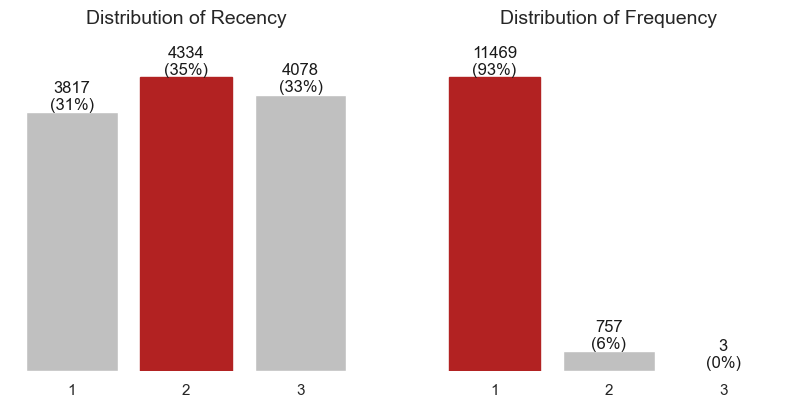

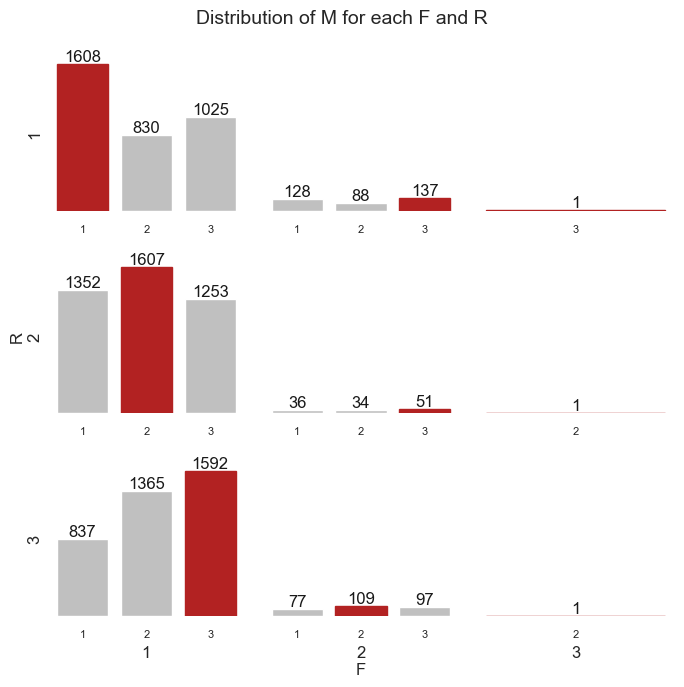

In [114]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = RFM_courses[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14,
                y=1.1)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='bottom',
               color='k')

plt.setp(axes, xticks=[1, 2, 3])
plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=3, ncols=3,
                         sharex=False, sharey=True,
                         figsize=(7, 7))

r_range = range(1, 4)
f_range = range(1, 4)
for r in r_range:
    for f in f_range:
        y = RFM_courses[(RFM_courses['R'] == r) & (RFM_courses['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 3:
            if f == 2:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 2:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

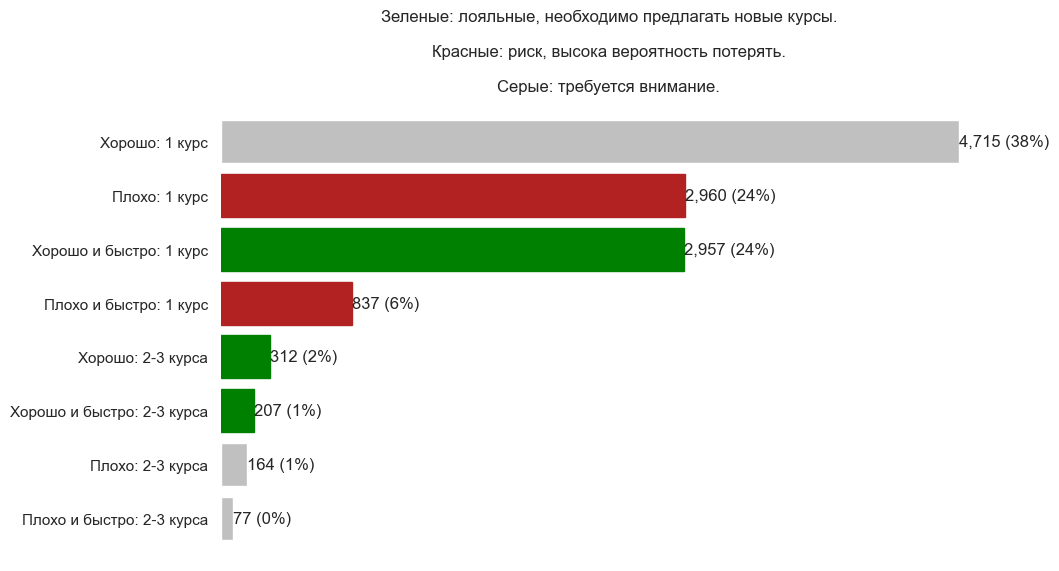

In [130]:
# count the number of customers in each segment
segments_counts = RFM_courses['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

ax.set_title('''Зеленые: лояльные, необходимо предлагать новые курсы.\n
Красные: риск, высока вероятность потерять.
\nСерые: требуется внимание.''')

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Хорошо и быстро: 1 курс',
                                        'Хорошо и быстро: 2-3 курса',
                                        'Хорошо: 2-3 курса']:
            bar.set_color('green')
        elif segments_counts.index[i] in ['Плохо: 1 курс',
                                          'Плохо и быстро: 1 курс']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

### Выводы по RFM:

1. Основная проблема в том, что 92% выпускников прошли только 1 курс. Причины могут быть разные:
- курсы разной направленности;
- плохое качество курсов;

2. 65% студентов набрали более 70 баллов (62%: 1 курс, 3%: 2-3 курса), соответственно, наибольшее количество студентов имеют хорошую успеваемость.

3. 25% студентов набрали более 70 баллов и быстро прошли курсы (24%: 1 курс, 1%: 2-3 курса)

4. К 30% студентов прошедших всего 1 курс требуется внимание, чтобы не потерять их совсем.

*Cегментация выглядит не лучшим образом, т.к. сложно подобрать критерий F. При рассмотрении студетов завершивших курсы у нас слишком мало повторных прохождений. Если брать всех, особой изменчивости не появится, т.к. будет много студентов не прошедших ни одного курса.*